In [1]:
import pandas as pd

# Load the dataset
data_path = 'cleaned_destination_data.csv'
df = pd.read_csv(data_path)

# Show the first 5 rows
df.head()

# Display dataset info to check for data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                398 non-null    object 
 1   lat                 397 non-null    float64
 2   lng                 397 non-null    float64
 3   formatted_address   398 non-null    object 
 4   rating              343 non-null    float64
 5   user_ratings_total  343 non-null    float64
 6   latest_reviews      398 non-null    object 
 7   cleaned_name        398 non-null    object 
 8   cleaned_address     398 non-null    object 
 9   cleaned_reviews     398 non-null    object 
dtypes: float64(4), object(6)
memory usage: 31.2+ KB


## Exploring Missing Values

In [2]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

name                   0
lat                    1
lng                    1
formatted_address      0
rating                55
user_ratings_total    55
latest_reviews         0
cleaned_name           0
cleaned_address        0
cleaned_reviews        0
dtype: int64


## Basic Statistical Summary

In [3]:
# Descriptive statistics for numerical columns (if any)
df.describe()

# Describe cleaned reviews
df['cleaned_reviews'].describe()

count                                                   398
unique                                                  398
top       Arugam Bay Beach is a surfers paradise I spent...
freq                                                      1
Name: cleaned_reviews, dtype: object

## Word Cloud of Reviews

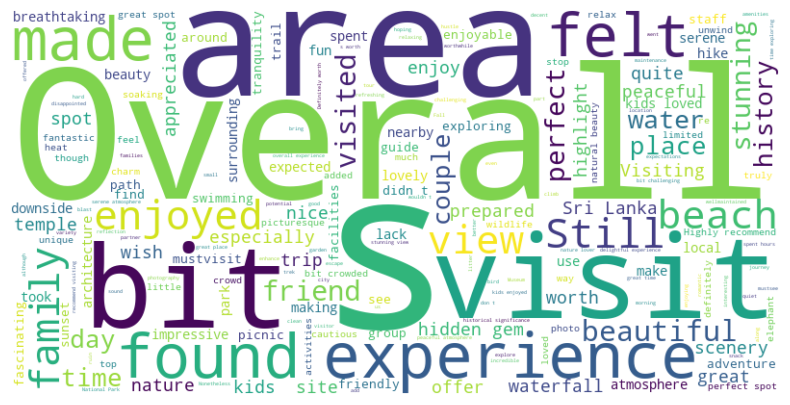

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all reviews into a single string
all_reviews = ' '.join(df['cleaned_reviews'].values)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Review Length Analysis

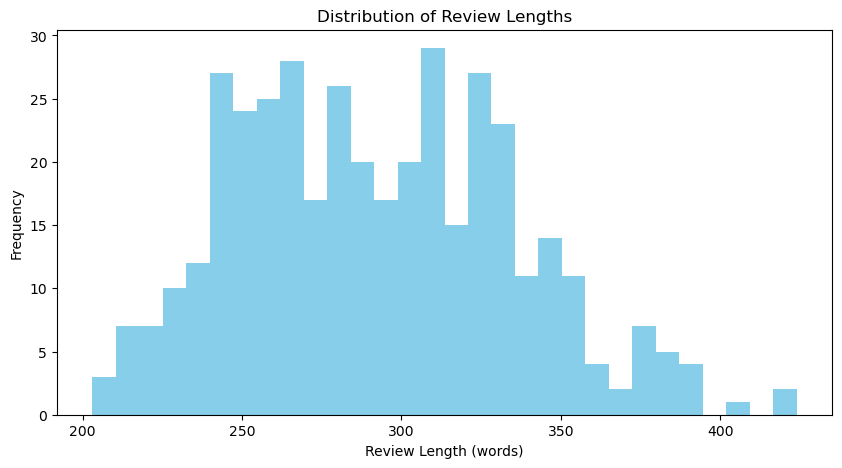

In [7]:
# Add a new column for review lengths
df['review_length'] = df['cleaned_reviews'].apply(lambda x: len(x.split()))

# Plot the distribution of review lengths
plt.figure(figsize=(10, 5))
plt.hist(df['review_length'], bins=30, color='skyblue')
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length (words)')
plt.ylabel('Frequency')
plt.show()

## Common Words and Phrases

In [8]:
from collections import Counter
from nltk.corpus import stopwords
from nltk.util import ngrams
import re

# Define a function to clean and tokenize text
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text.lower())  # Remove punctuation and lower the text
    tokens = text.split()
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    return tokens

# Tokenize and count unigrams
df['tokens'] = df['cleaned_reviews'].apply(lambda x: clean_text(x))
all_tokens = [token for sublist in df['tokens'] for token in sublist]
unigram_counts = Counter(all_tokens).most_common(20)

print("Most Common Unigrams:")
print(unigram_counts)

# Analyze bigrams
bigrams = list(ngrams(all_tokens, 2))
bigram_counts = Counter(bigrams).most_common(20)

print("Most Common Bigrams:")
print(bigram_counts)

Most Common Unigrams:
[('experience', 819), ('bit', 749), ('overall', 575), ('enjoyed', 550), ('however', 498), ('visit', 454), ('beach', 453), ('spot', 412), ('felt', 408), ('great', 396), ('place', 389), ('made', 382), ('beautiful', 381), ('family', 372), ('found', 372), ('stunning', 371), ('views', 364), ('time', 361), ('peaceful', 352), ('area', 349)]
Most Common Bigrams:
[(('sri', 'lanka'), 184), (('hidden', 'gem'), 179), (('could', 'use'), 143), (('worth', 'visit'), 125), (('kids', 'loved'), 123), (('highly', 'recommend'), 88), (('felt', 'bit'), 86), (('couple', 'found'), 83), (('natural', 'beauty'), 82), (('however', 'wish'), 78), (('felt', 'like'), 71), (('spent', 'hours'), 71), (('bit', 'crowded'), 70), (('would', 'recommend'), 70), (('kids', 'enjoyed'), 69), (('perfect', 'spot'), 69), (('highlight', 'trip'), 68), (('historical', 'significance'), 67), (('great', 'spot'), 66), (('serene', 'atmosphere'), 65)]


## Exploring Specific Terms

In [24]:
# Define specific terms to analyze
specific_terms = ['surfing', 'beach', 'clean', 'crowded']

# Count how many reviews mention each specific term
term_counts = {term: df['cleaned_reviews'].str.contains(term, case=False).sum() for term in specific_terms}

print("Specific Term Counts:")
print(term_counts)


Specific Term Counts:
{'surfing': 14, 'beach': 66, 'clean': 85, 'crowded': 185}


## Bar Plot of Most Frequent Words

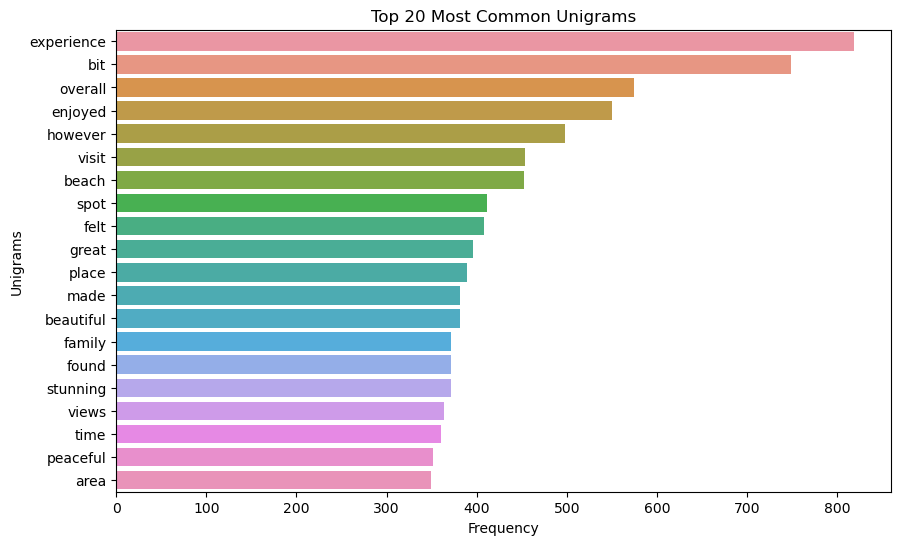

In [11]:
import seaborn as sns

# Create a DataFrame for the most common unigrams
unigram_df = pd.DataFrame(unigram_counts, columns=['word', 'count'])

# Plot the top 20 most common unigrams
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='word', data=unigram_df)
plt.title('Top 20 Most Common Unigrams')
plt.xlabel('Frequency')
plt.ylabel('Unigrams')
plt.show()

## Comparison of Review Length by Reviewer Location

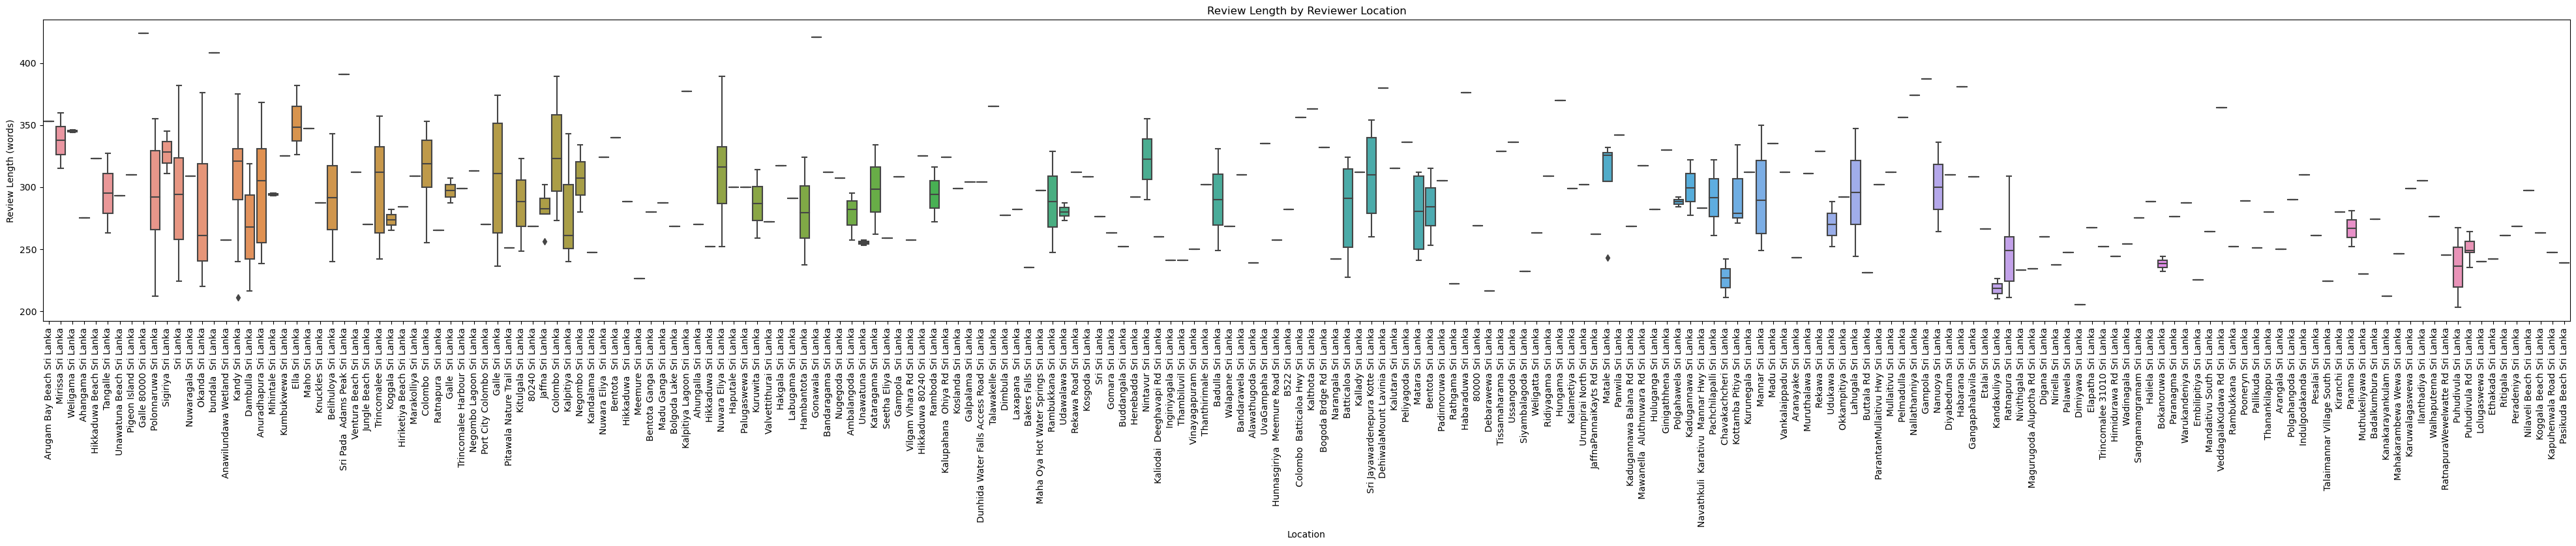

In [18]:
plt.figure(figsize=(50, 6))
sns.boxplot(x='cleaned_address', y='review_length', data=df)
plt.title('Review Length by Reviewer Location')
plt.xlabel('Location')
plt.ylabel('Review Length (words)')
plt.xticks(rotation=90)
plt.show()